In [8]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [9]:
df = pd.read_csv("Indian_IPO_Market_Data.csv")
print(df.head())

      Date           IPOName  Issue_Size  Subscription_QIB  Subscription_HNI  \
0  03/02/10    Infinite Comp      189.80             48.44            106.02   
1  08/02/10    Jubilant Food      328.70             59.39             51.95   
2  15/02/10    Syncom Health       56.25              0.99             16.60   
3  15/02/10  Vascon Engineer      199.80              1.12              3.65   
4  19/02/10      Thangamayil        0.00              0.52              1.52   

   Subscription_RII  Subscription_Total  Issue_Price  Listing_Gains_Percent  
0             11.08               43.22          165                  11.82  
1              3.79               31.11          145                 -84.21  
2              6.25                5.17           75                  17.13  
3              0.62                1.22          165                 -11.28  
4              2.26                1.12           75                  -5.20  


In [10]:
print(df.tail())

        Date           IPOName  Issue_Size  Subscription_QIB  \
314  26/08/22        Syrma SGS      840.13             42.42   
315  06/09/22  Dreamfolks Serv      562.10             27.48   
316  15/09/22              TMB      792.00              0.51   
317  26/09/22  Harsha Engineer      755.00            113.82   
318  17/10/22  Electronics Mar      500.00             58.81   

     Subscription_HNI  Subscription_RII  Subscription_Total  Issue_Price  \
314              7.13              2.84               15.59          220   
315             14.18             24.19               23.25          326   
316              1.77              3.44                1.39          525   
317             40.36             12.44               47.19          330   
318             15.39              8.27               24.23           59   

     Listing_Gains_Percent  
314                  42.30  
315                  41.92  
316                  -3.15  
317                  47.24  
318          

In [11]:
print(df.columns)

Index(['Date ', 'IPOName', 'Issue_Size', 'Subscription_QIB',
       'Subscription_HNI', 'Subscription_RII', 'Subscription_Total',
       'Issue_Price', 'Listing_Gains_Percent'],
      dtype='object')


### Data Dictionary

The data consists of following columns:

Date: date when the IPO was listed

IPOName: name of the IPO

Issue_Size: size of the IPO issue, in INR Crores

Subscription_QIB: number of times the IPO was subscribed by the QIB (Qualified Institutional Buyer) investor category

Subscription_HNI: number of times the IPO was subscribed by the HNI (High Networth Individual) investor category

Subscription_RII: number of times the IPO was subscribed by the RII (Retail Individual Investors) investor category

Subscription_Total: total number of times the IPO was subscribed overall

Issue_Price: the price in INR at which the IPO was issued

Listing_Gains_Percent: is the percentage gain in the listing price over the issue price

In [12]:
df["Listing_Gains_Percent"].describe()

count    319.000000
mean       4.742696
std       47.650946
min      -97.150000
25%      -11.555000
50%        1.810000
75%       25.310000
max      270.400000
Name: Listing_Gains_Percent, dtype: float64

In [13]:
print(df.describe(include="all"))

           Date         IPOName    Issue_Size  Subscription_QIB  \
count        319            319    319.000000        319.000000   
unique       287            319           NaN               NaN   
top     16/08/21  Infinite Comp           NaN               NaN   
freq           4              1           NaN               NaN   
mean         NaN            NaN   1192.859969         25.684138   
std          NaN            NaN   2384.643786         40.716782   
min          NaN            NaN      0.000000          0.000000   
25%          NaN            NaN    169.005000          1.150000   
50%          NaN            NaN    496.250000          4.940000   
75%          NaN            NaN   1100.000000         34.635000   
max          NaN            NaN  21000.000000        215.450000   

        Subscription_HNI  Subscription_RII  Subscription_Total  Issue_Price  \
count         319.000000        319.000000          319.000000   319.000000   
unique               NaN             

In [14]:
df.shape

(319, 9)

In [15]:
# Create a categorical target variable, Listing_Gains_Profit, which takes the binary values 1 when Listing_Gains_Percent is positive and 0 otherwise.

df['Listing_Gains_Profit'] = np.where(df['Listing_Gains_Percent'] > 0, 1, 0)

In [16]:
df['Listing_Gains_Profit'].describe()

count    319.000000
mean       0.545455
std        0.498712
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Listing_Gains_Profit, dtype: float64

In [17]:
df['Listing_Gains_Profit'].value_counts(normalize=True)

Listing_Gains_Profit
1    0.545455
0    0.454545
Name: proportion, dtype: float64

In [18]:
df = df.drop(['Date ', 'IPOName', 'Listing_Gains_Percent'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Issue_Size            319 non-null    float64
 1   Subscription_QIB      319 non-null    float64
 2   Subscription_HNI      319 non-null    float64
 3   Subscription_RII      319 non-null    float64
 4   Subscription_Total    319 non-null    float64
 5   Issue_Price           319 non-null    int64  
 6   Listing_Gains_Profit  319 non-null    int32  
dtypes: float64(5), int32(1), int64(1)
memory usage: 16.3 KB


We can see approximately 55% of the IPOs listed in profit, and we can also see that the data is fairly balanced. We have also dropped some of the variables that might not carry predictive power. 

## Data Visualization 

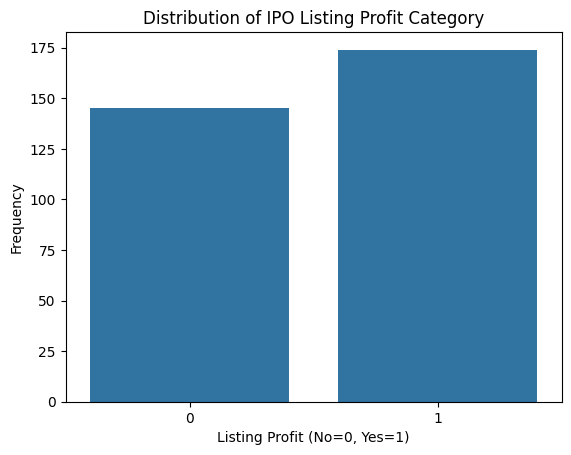

In [19]:
# visualizing the target variable
sns.countplot(x='Listing_Gains_Profit', data=df)
plt.title('Distribution of IPO Listing Profit Category')
plt.xlabel('Listing Profit (No=0, Yes=1)')
plt.ylabel('Frequency')
plt.show()

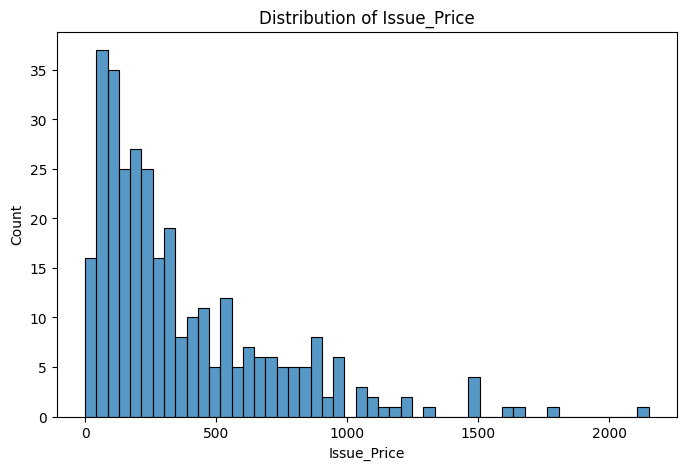

In [20]:
plt.figure(figsize=[8,5])
sns.histplot(data=df, x='Issue_Price', bins=50).set(title='Distribution of Issue_Price', ylabel='Count')
plt.show()

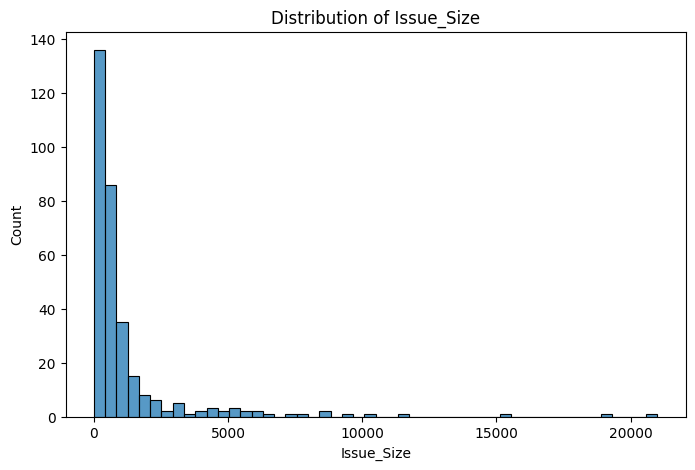

In [21]:
plt.figure(figsize=[8,5])
sns.histplot(data=df, x='Issue_Size', bins=50).set(title='Distribution of Issue_Size', ylabel='Count')
plt.show()

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


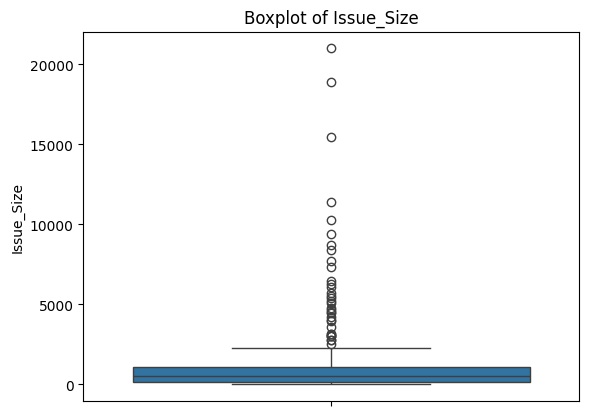

In [22]:
sns.boxplot(data=df, y='Issue_Size')
plt.title('Boxplot of Issue_Size')
plt.show()

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


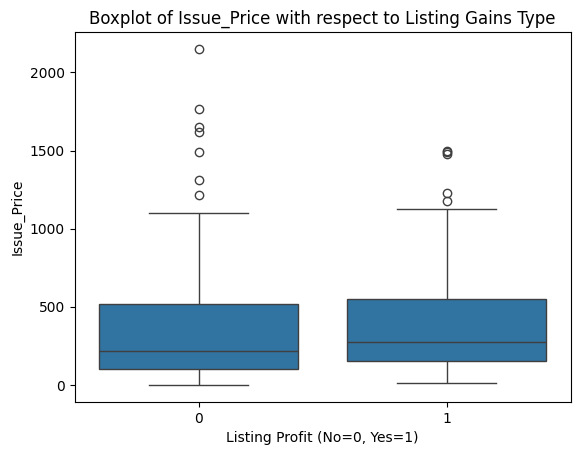

In [23]:
sns.boxplot(data=df, x='Listing_Gains_Profit', y='Issue_Price')
plt.title('Boxplot of Issue_Price with respect to Listing Gains Type')
plt.xlabel('Listing Profit (No=0, Yes=1)')
plt.show()

In [24]:
print(df.skew())

Issue_Size              4.853402
Subscription_QIB        2.143705
Subscription_HNI        3.078445
Subscription_RII        3.708274
Subscription_Total      2.911907
Issue_Price             1.696881
Listing_Gains_Profit   -0.183438
dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


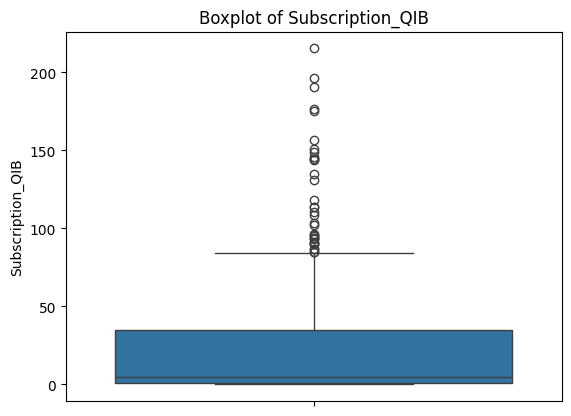

In [25]:
sns.boxplot(data=df, y='Subscription_QIB')
plt.title('Boxplot of Subscription_QIB')
plt.show()

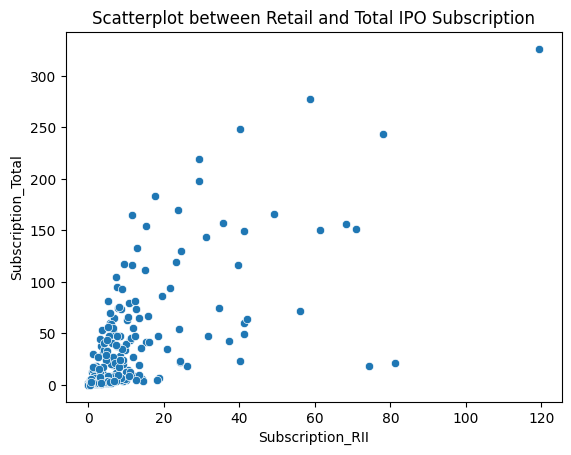

In [26]:
sns.scatterplot(data=df, x='Subscription_RII', y='Subscription_Total')
plt.title('Scatterplot between Retail and Total IPO Subscription')
plt.show()

Here are some of the findings that we can draw from the visualizations above:

1. The histogram and the boxplots show that outliers are present in the data and might need outlier treatment. 

2. The boxplot of `Issue_Price`, with respect to `Listing_Gains_Profit`, shows that there are more outliers for IPOs that listed a loss than there are outliers for IPOs that listed a profit. 

3. We also observed a correlation between Retail and Total IPO Subscription via a scatterplot. You can check for correlations between other continuous variables as well.  

## Outlier Treatment

Since there are outliers in the data, we need to treat them. However, feel free to use a different approach or choose to work with outliers. 

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


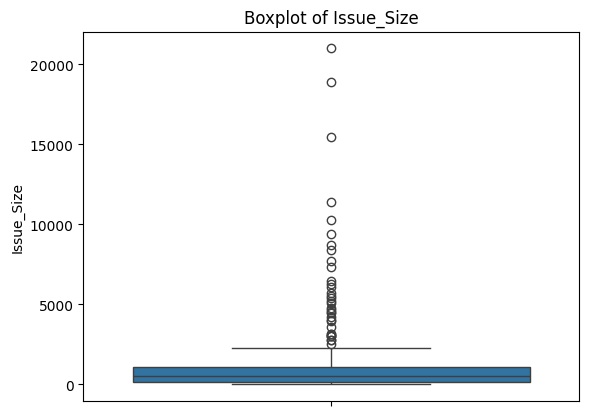

In [27]:
sns.boxplot(data=df, y='Issue_Size')
plt.title('Boxplot of Issue_Size')
plt.show()

In [28]:
q1 = df['Issue_Size'].quantile(q=0.25)
q3 = df['Issue_Size'].quantile(q=0.75)  
iqr = q3 - q1   
lower = (q1 - 1.5 * iqr) 
upper = (q3 + 1.5 * iqr) 
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

IQR = 930.995
lower = -1227.4875000000002
upper = 2496.4925000000003


In [29]:
df['Issue_Size'] = df['Issue_Size'].clip(lower, upper)
df['Issue_Size'].describe()

count     319.000000
mean      763.561238
std       769.689122
min         0.000000
25%       169.005000
50%       496.250000
75%      1100.000000
max      2496.492500
Name: Issue_Size, dtype: float64

In [30]:
q1 = df['Subscription_QIB'].quantile(q=0.25)
q3 = df['Subscription_QIB'].quantile(q=0.75)  
iqr = q3 - q1   
lower = (q1 - 1.5 * iqr) 
upper = (q3 + 1.5 * iqr) 
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

IQR = 33.48500000000001
lower = -49.07750000000001
upper = 84.86250000000001


In [31]:
df['Subscription_QIB'] = df['Subscription_QIB'].clip(lower, upper)
df['Subscription_QIB'].describe()

count    319.000000
mean      21.521183
std       29.104549
min        0.000000
25%        1.150000
50%        4.940000
75%       34.635000
max       84.862500
Name: Subscription_QIB, dtype: float64

In [32]:
q1 = df['Subscription_HNI'].quantile(q=0.25)
q3 = df['Subscription_HNI'].quantile(q=0.75)  
iqr = q3 - q1   
lower = (q1 - 1.5 * iqr) 
upper = (q3 + 1.5 * iqr) 
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

IQR = 60.839999999999996
lower = -90.005
upper = 153.355


In [33]:
df['Subscription_HNI'] = df['Subscription_HNI'].clip(lower, upper)
df['Subscription_HNI'].describe()

count    319.000000
mean      40.356426
std       57.427921
min        0.000000
25%        1.255000
50%        5.070000
75%       62.095000
max      153.355000
Name: Subscription_HNI, dtype: float64

In [34]:
q1 = df['Subscription_RII'].quantile(q=0.25)
q3 = df['Subscription_RII'].quantile(q=0.75)  
iqr = q3 - q1   
lower = (q1 - 1.5 * iqr) 
upper = (q3 + 1.5 * iqr) 
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

IQR = 7.33
lower = -9.72
upper = 19.6


In [35]:
df['Subscription_RII'] = df['Subscription_RII'].clip(lower, upper)
df['Subscription_RII'].describe()

count    319.000000
mean       6.060940
std        6.176882
min        0.000000
25%        1.275000
50%        3.420000
75%        8.605000
max       19.600000
Name: Subscription_RII, dtype: float64

In [36]:
q1 = df['Subscription_Total'].quantile(q=0.25)
q3 = df['Subscription_Total'].quantile(q=0.75)  
iqr = q3 - q1   
lower = (q1 - 1.5 * iqr) 
upper = (q3 + 1.5 * iqr) 
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

IQR = 31.749999999999996
lower = -45.97999999999999
upper = 81.01999999999998


In [37]:
df['Subscription_Total'] = df['Subscription_Total'].clip(lower, upper)
df['Subscription_Total'].describe()

count    319.000000
mean      20.456646
std       27.217740
min        0.000000
25%        1.645000
50%        4.930000
75%       33.395000
max       81.020000
Name: Subscription_Total, dtype: float64

There are different approaches to outlier treatment, but the one we've used here is outlier identification using the interquartile menthod. Once we identified the outliers, we clipped the variable values between the upper and lower bounds. This is only one appoach — feel free to experiment with other methods. 

## Setting the Target and Predictor Variables

Before moving on to modeling, we need to do the following:

Set the target and predictor variables.

Bring the predictor variable values to a uniform scale.

In [38]:
target_variable = ['Listing_Gains_Profit'] 
predictors = list(set(list(df.columns)) - set(target_variable))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Profit
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.305854,0.253601,0.263157,0.309232,0.252489,0.174478,0.545455
std,0.308308,0.342961,0.374477,0.315147,0.335939,0.164604,0.498712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067697,0.013551,0.008184,0.065051,0.020304,0.055349,0.000000
50%,0.198779,0.058212,0.033061,0.174490,0.060849,0.116279,1.000000
75%,0.440618,0.408131,0.404910,0.439031,0.412182,0.249302,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We have created an object of the dependent variable called `target_variable` and also a list of all the features, excluding the target variable `Listing_Gains_Profit`. During data exploration, we observed that the distribution of the variables differed significantly. This could influence the modeling process, so to prevent this, we performed normalization by scaling the predictors. You can see that the normalized values of the predictors lie between 0 and 1.

## Creating the Holdout Validation Approach

In [39]:
X = df[predictors].values
y = df[target_variable].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)
print(X_train.shape); print(X_test.shape)

(223, 6)
(96, 6)


We will use the hold out validation approach to model evaluation. In this approach, we will divide the data in the 70:30 ratio, where we will use 70% of the data for training the model, while we will use the other 30% of the data to test the model. Feel free to use a different train-to-test ratio. 

## Define the Deep Learning Classification Model

We need to consider the following steps while defining and building the dense deep learning model.

Instantiating the model

Adding the hidden layers

Selecting the activation functions

In [40]:
# define model
tf.random.set_seed(100)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape = (X_train.shape[1],), activation = 'relu'))
model.add(tf.keras.layers.Dense(16, activation= 'relu'))
model.add(tf.keras.layers.Dense(8, activation= 'relu'))
model.add(tf.keras.layers.Dense(4, activation= 'relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) 

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In this step, we have defined the model by instantiating the sequential model class in TensorFlow's Keras. The model architecture is comprised of four hidden layers with `relu` as the activation function. The output layer uses a `sigmoid` activation function, which is a good choice for a binary classification model. Feel free to experiment with different model architectures, activation functions, and the number of nodes in each layer!

## Compile and Train the model

In [41]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

compiling a model requires us to specify the following:

An optimizer

A loss function

An evaluation metric

In [42]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 929 (3.63 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 0 (0.00 B)

None


In [43]:
model.fit(X_train, y_train, epochs=250)

Epoch 1/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4826 - loss: 0.6948
Epoch 2/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5981 - loss: 0.6923 
Epoch 3/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5453 - loss: 0.6923 
Epoch 4/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - accuracy: 0.5270 - loss: 0.6921
Epoch 5/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5218 - loss: 0.6920 
Epoch 6/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5687 - loss: 0.6918 
Epoch 7/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5740 - loss: 0.6916 
Epoch 8/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5637 - loss: 0.6913 
Epoch 9/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5685 - loss: 0.6911 
Epoch 10/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5771 - loss: 0.6908  
Epoch 11/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5668 - loss: 0.6902 
Epoch 12/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5917 - lo

We compiled the model with an appropriate optimizer, a loss function, and an evaluation metric. After compiling the model, we fit it on the training set, and we set the epoch count to 250. We can see that the accuracy improved over the 250 epochs. 

## Model Evaluation

In [44]:
model.evaluate(X_train, y_train)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7573 - loss: 0.4805  


[0.4622634947299957, 0.7668161392211914]

In [45]:
model.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6641 - loss: 0.7209 


[0.7089733481407166, 0.6875]

The model evaluation output shows the performance of the model on both training and test data. The accuracy was approximately 75% on the training data and 74% on the test data. Ideally, the higher the accuracy value, the better the model is performing. It's noteworthy that the training and test set accuracies are close to each other, which shows that there is consistency and that the accuracy doesn't drop too much when we test the model on unseen data. 

## Conclusion

In this project, we have built Deep Learning Classification models using the deep learning framework, Keras, in TensorFlow. We used a real-world IPO dataset and built a classifier algorithm to predict whether an IPO will list at profit or not.

We used the Sequential API to build the model, which is achieving a decent accuracy of 75% and 74% on training and test data, respectively. We see that the accuracy is consistent across the training and test datasets, which is a promising sign. 

This is just one of the many ways to model this solution — you can try out different combinations to further improve model performance.